<a href="https://www.kaggle.com/code/juanignaciohernndez/myanimelist-top-2000-anime-dataset-analysis?scriptVersionId=95861611" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Introduction**
Hi! This is my first Kaggle Notebook, and im starting in the area of Data Analysis so i hope you like it and please let me know what i can improve.

In this notebook i will be doing a simple Data Analysis on the [MyAnimeList Top 2000 Animes Dataset](https://www.kaggle.com/datasets/brunobacelardc/myanimelist-top-1000-anime).

Let's begin by importing some packages and initializing some variables.

In [1]:
#Imports
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization
import matplotlib.pyplot as plt #visualization

#Seaborn theme
sns.set_theme(style="darkgrid")

# Importing the data

Import data and do some EDA (Exploratory Data Analysis).

In [2]:
#Read csv
df = pd.read_csv("/kaggle/input/myanimelist-top-1000-anime/mal_top2000_anime.csv", index_col=0)
df.head()

,Name,Type,Score,Score Rank,Popularity Rank,Air Date,Studio,Num. of episodes,Genres,Theme(s),Demographic
0,Fullmetal Alchemist: Brotherhood,TV,9.14,1,3,"Apr 5, 2009 to Jul 4, 2010",['Bones'],64,"['Action', 'Adventure', 'Drama', 'Fantasy']",['Military'],Shounen
1,Spy x Family,TV,9.09,2,350,"Apr 9, 2022 to ?","['Wit Studio', ' CloverWorks']",12,"['Action', 'Comedy']",['Childcare'],Shounen
2,Shingeki no Kyojin Season 3 Part 2,TV,9.08,3,32,"Apr 29, 2019 to Jul 1, 2019",['Wit Studio'],10,"['Action', 'Drama']","['Gore', 'Military', 'Survival']",Shounen
3,Steins;Gate,TV,9.08,4,13,"Apr 6, 2011 to Sep 14, 2011",['White Fox'],24,"['Drama', 'Sci-Fi', 'Suspense']","['Psychological', 'Time Travel']",None
4,Gintama°,TV,9.08,5,335,"Apr 8, 2015 to Mar 30, 2016",['Bandai Namco Pictures'],51,"['Action', 'Comedy', 'Sci-Fi']","['Gag Humor', 'Historical', 'Parody', 'Samurai']",Shounen


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              2000 non-null   object 
 1   Type              2000 non-null   object 
 2   Score             2000 non-null   float64
 3   Score Rank        2000 non-null   int64  
 4   Popularity Rank   2000 non-null   int64  
 5   Air Date          2000 non-null   object 
 6   Studio            2000 non-null   object 
 7   Num. of episodes  2000 non-null   int64  
 8   Genres            2000 non-null   object 
 9   Theme(s)          2000 non-null   object 
 10  Demographic       2000 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 187.5+ KB


# Preprocessing data

We don't have any null value, but it seems like some columns don't have the correct dtype.

The values in the column **Air Date** are strings.

We can extract the **Start Date** and **End Date** from that strings, and make them columns with dtype "*datetime*".

Having the datetime columns, we can now extract the **Year** into another column.

In [4]:
#Divide the Air Date column into Start Date and End Date columns
air_date_split = df["Air Date"].str.split(" to ")
df["Start Date"] = air_date_split.apply(lambda x : x[0])
df["End Date"] = air_date_split.apply(lambda x : x[1] if len(x) > 1 else None)
#Drop the Air Date column
df.drop("Air Date", axis=1, inplace = True)
#Transform 'Start Date' into date column
df["Start Date"] = pd.to_datetime(df["Start Date"])
#Add year column
df["Year"] = df["Start Date"].dt.year
#See the results
df.head()

,Name,Type,Score,Score Rank,Popularity Rank,Studio,Num. of episodes,Genres,Theme(s),Demographic,Start Date,End Date,Year
0,Fullmetal Alchemist: Brotherhood,TV,9.14,1,3,['Bones'],64,"['Action', 'Adventure', 'Drama', 'Fantasy']",['Military'],Shounen,2009-04-05,"Jul 4, 2010",2009
1,Spy x Family,TV,9.09,2,350,"['Wit Studio', ' CloverWorks']",12,"['Action', 'Comedy']",['Childcare'],Shounen,2022-04-09,?,2022
2,Shingeki no Kyojin Season 3 Part 2,TV,9.08,3,32,['Wit Studio'],10,"['Action', 'Drama']","['Gore', 'Military', 'Survival']",Shounen,2019-04-29,"Jul 1, 2019",2019
3,Steins;Gate,TV,9.08,4,13,['White Fox'],24,"['Drama', 'Sci-Fi', 'Suspense']","['Psychological', 'Time Travel']",None,2011-04-06,"Sep 14, 2011",2011
4,Gintama°,TV,9.08,5,335,['Bandai Namco Pictures'],51,"['Action', 'Comedy', 'Sci-Fi']","['Gag Humor', 'Historical', 'Parody', 'Samurai']",Shounen,2015-04-08,"Mar 30, 2016",2015


We can see that the columns **Type** and **Demographic** are also strings. Let's transform them into *categories*.

In [5]:
#Categorize Type and Demographic columns
df["Type"] = df["Type"].astype("category")
df["Demographic"] = df["Demographic"].astype("category")
#See the results
df[["Type", "Demographic"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Type         2000 non-null   category
 1   Demographic  2000 non-null   category
dtypes: category(2)
memory usage: 20.0 KB


# Analyzing data

We can now answer some basic questions about the data, like:

What are the Top 10 Animes by **score**?

And the Top 10 Animes by **popularity**?

In [6]:
#Top 10 animes by Score
top10score = df.sort_values("Score Rank").head(10)
top10score

,Name,Type,Score,Score Rank,Popularity Rank,Studio,Num. of episodes,Genres,Theme(s),Demographic,Start Date,End Date,Year
0,Fullmetal Alchemist: Brotherhood,TV,9.14,1,3,['Bones'],64,"['Action', 'Adventure', 'Drama', 'Fantasy']",['Military'],Shounen,2009-04-05,"Jul 4, 2010",2009
1,Spy x Family,TV,9.09,2,350,"['Wit Studio', ' CloverWorks']",12,"['Action', 'Comedy']",['Childcare'],Shounen,2022-04-09,?,2022
2,Shingeki no Kyojin Season 3 Part 2,TV,9.08,3,32,['Wit Studio'],10,"['Action', 'Drama']","['Gore', 'Military', 'Survival']",Shounen,2019-04-29,"Jul 1, 2019",2019
3,Steins;Gate,TV,9.08,4,13,['White Fox'],24,"['Drama', 'Sci-Fi', 'Suspense']","['Psychological', 'Time Travel']",None,2011-04-06,"Sep 14, 2011",2011
4,Gintama°,TV,9.08,5,335,['Bandai Namco Pictures'],51,"['Action', 'Comedy', 'Sci-Fi']","['Gag Humor', 'Historical', 'Parody', 'Samurai']",Shounen,2015-04-08,"Mar 30, 2016",2015
5,Gintama',TV,9.05,6,385,['Sunrise'],51,"['Action', 'Comedy', 'Sci-Fi']","['Gag Humor', 'Historical', 'Parody', 'Samurai']",Shounen,2011-04-04,"Mar 26, 2012",2011
6,Gintama: The Final,Movie,9.05,7,1746,['Bandai Namco Pictures'],1,"['Action', 'Comedy', 'Drama', 'Sci-Fi']","['Gag Humor', 'Historical', 'Parody', 'Samurai']",Shounen,2021-01-08,None,2021
7,Hunter x Hunter (2011),TV,9.05,8,10,['Madhouse'],148,"['Action', 'Adventure', 'Fantasy']",['None'],Shounen,2011-10-02,"Sep 24, 2014",2011
8,Fruits Basket: The Final,TV,9.04,9,551,['TMS Entertainment'],13,"['Drama', 'Romance', 'Slice of Life', 'Superna...",['None'],Shoujo,2021-04-06,"Jun 29, 2021",2021
9,Gintama': Enchousen,TV,9.04,10,695,['Sunrise'],13,"['Action', 'Comedy', 'Sci-Fi']","['Gag Humor', 'Historical', 'Parody', 'Samurai']",Shounen,2012-10-04,"Mar 28, 2013",2012


In [7]:
#Top 10 animes by Popularity
top10pop = df.sort_values("Popularity Rank").head(10)
top10pop

,Name,Type,Score,Score Rank,Popularity Rank,Studio,Num. of episodes,Genres,Theme(s),Demographic,Start Date,End Date,Year
102,Shingeki no Kyojin,TV,8.53,103,1,['Wit Studio'],25,"['Action', 'Drama']","['Gore', 'Military', 'Survival']",Shounen,2013-04-07,"Sep 29, 2013",2013
69,Death Note,TV,8.63,70,2,['Madhouse'],37,"['Supernatural', 'Suspense']",['Psychological'],Shounen,2006-10-04,"Jun 27, 2007",2006
0,Fullmetal Alchemist: Brotherhood,TV,9.14,1,3,['Bones'],64,"['Action', 'Adventure', 'Drama', 'Fantasy']",['Military'],Shounen,2009-04-05,"Jul 4, 2010",2009
113,One Punch Man,TV,8.51,114,4,['Madhouse'],12,"['Action', 'Comedy']","['Parody', 'Super Power']",Seinen,2015-10-05,"Dec 21, 2015",2015
628,Boku no Hero Academia,TV,7.95,629,6,['Bones'],13,['Action'],"['School', 'Super Power']",Shounen,2016-04-03,"Jun 26, 2016",2016
878,Tokyo Ghoul,TV,7.80,879,7,['Studio Pierrot'],12,"['Action', 'Fantasy', 'Horror']","['Gore', 'Psychological']",Seinen,2014-07-04,"Sep 19, 2014",2014
604,Naruto,TV,7.97,605,8,['Studio Pierrot'],220,"['Action', 'Adventure', 'Fantasy']",['Martial Arts'],Shounen,2002-10-03,"Feb 8, 2007",2002
89,Kimetsu no Yaiba,TV,8.55,90,9,['ufotable'],26,"['Action', 'Fantasy']",['Historical'],Shounen,2019-04-06,"Sep 28, 2019",2019
7,Hunter x Hunter (2011),TV,9.05,8,10,['Madhouse'],148,"['Action', 'Adventure', 'Fantasy']",['None'],Shounen,2011-10-02,"Sep 24, 2014",2011
24,Kimi no Na wa.,Movie,8.87,25,11,['CoMix Wave Films'],1,"['Drama', 'Supernatural']",['Romantic Subtext'],None,2016-08-26,None,2016


Looks like ***Fullmetal Alchemist: Brotherhood***, ***Hunter x Hunter (2011)*** and ***Shingeki no Kyojin*** are both popular and good!

Now lets make our first plot. We want too see how many Animes are by **Type**, so a *Countplot* should do the thing.

Text(0.5, 1.0, 'Total Animes by Type')

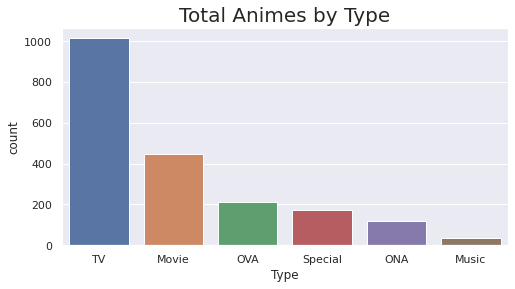

In [8]:
#Countplot of Types
ordered_cats = np.asarray(df.Type.value_counts().index)
plt.rcParams["figure.figsize"] = (8,4)
ax = sns.countplot(x="Type", data=df, order=ordered_cats)
ax.set_title("Total Animes by Type", fontsize=20)

We can see around 1000 Animes are *TV Series* and almost 500 are *Movies*.

Now lets use the **Year** column we created earlier, and see the total of Animes by **Type** across the diferent years.

A *Lineplot* should work well here.

Text(0.5, 1.0, 'Total Anime by Year')

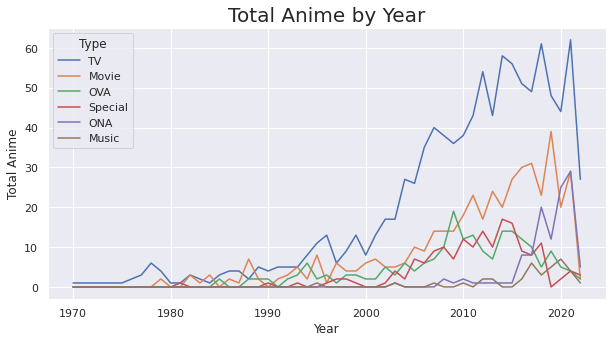

In [9]:
#Lineplot of Series by year
animes_by_year = df.groupby(["Type", "Year"], as_index=False).size()
plt.rcParams["figure.figsize"] = (10,5)
ax = sns.lineplot(x="Year", y="size", data=animes_by_year, hue="Type",
                  hue_order=["TV", "Movie", "OVA", "Special", "ONA", "Music"])
sns.move_legend(ax, "upper left")
ax.set_ylabel("Total Anime")
ax.set_title("Total Anime by Year", fontsize=20)

In first place, it should be noted that the drops in the graphs at the end are due to the fact that we have not yet reached the middle of 2022, so we can safely ignore them.
Said that, we can see some interesting things:
* It seems like the **Total Anime TV Series/Movies** are *constantly increasing* every year.
* The **ONA (Original Network Animes)** *are growing its popularity since 2015*.
* The other types **(Special, OVA and Music)** are pretty low in terms of Total Animes by Year *(less than 10)*.

Let's now use the other categorical column we have, the **Demographic**.
We can use a *countplot* to visualize the number of Anime by its Demographic.

Text(0.5, 1.0, 'Total Animes by Demographic')

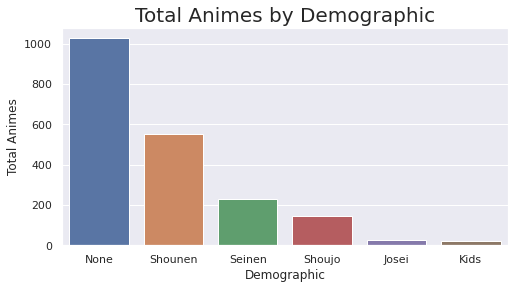

In [10]:
# Countplot of Anime by Demographic
animes_by_demo = df.groupby("Demographic", as_index=False, observed=True).size()
ordered_cats = animes_by_demo.sort_values("size", ascending=False)["Demographic"]
plt.rcParams["figure.figsize"] = (8, 4)
ax = sns.barplot(x="Demographic", y="size", data=animes_by_demo, order=ordered_cats)
ax.set_ylabel("Total Animes")
ax.set_title("Total Animes by Demographic", fontsize=20)

If we discard the non-labeled Animes (shown as **None**), we can see the most popular *Demographic* type is **Shounen** (male teen oriented) with more than 500 Animes (25% of the dataset).

We can now explore the **Genres** column. It's a *string* so we need to convert it into a *list*.
Let's define a simple method that do this.

In [11]:
def str_values_to_list(str_values):
    
    """
    Parameters
    ----------
    str_genres : string
        A string of values in the format: '["value 1", "value 2"]'

    Returns
    -------
    list_values : list
        A list of the values
    """
    str_values = str_values.strip("[]").replace("'", "")
    list_values = str_values.split(", ")
    
    return list_values

By applying this method to the **Genre** column, we get a list of genres for every Anime in the dataset.



In [12]:
#Transform the String values of the Genres column into actual lists of genres
df["Genres"] = df["Genres"].apply(str_values_to_list)

But in order to group by Genre, we need each row to have only one Genre. This is where the [Explode](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.explode.html) function comes in handy.

We can see in the following output that "*Fullmetal Alchemist: Brotherhood*" has now 4 entries, one for each **Genre**.

In [13]:
#Explode the genres column of a row into several rows with the same index
df_genre_exp = df.explode("Genres")
#Convert to category
df_genre_exp["Genres"] = df_genre_exp["Genres"].astype("category")
#See the results
df_genre_exp.head()

,Name,Type,Score,Score Rank,Popularity Rank,Studio,Num. of episodes,Genres,Theme(s),Demographic,Start Date,End Date,Year
0,Fullmetal Alchemist: Brotherhood,TV,9.14,1,3,['Bones'],64,Action,['Military'],Shounen,2009-04-05,"Jul 4, 2010",2009
0,Fullmetal Alchemist: Brotherhood,TV,9.14,1,3,['Bones'],64,Adventure,['Military'],Shounen,2009-04-05,"Jul 4, 2010",2009
0,Fullmetal Alchemist: Brotherhood,TV,9.14,1,3,['Bones'],64,Drama,['Military'],Shounen,2009-04-05,"Jul 4, 2010",2009
0,Fullmetal Alchemist: Brotherhood,TV,9.14,1,3,['Bones'],64,Fantasy,['Military'],Shounen,2009-04-05,"Jul 4, 2010",2009
1,Spy x Family,TV,9.09,2,350,"['Wit Studio', ' CloverWorks']",12,Action,['Childcare'],Shounen,2022-04-09,?,2022


We can group by genres now! Let's see the distribution of Animes by **Genre**.

Text(0.5, 1.0, 'Total Animes by Genres')

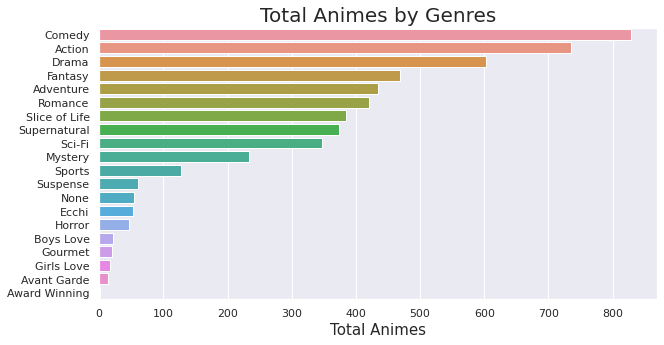

In [14]:
# Total series by genre
animes_by_genre = df_genre_exp.groupby("Genres").size().sort_values(ascending=False).reset_index()
plt.rcParams["figure.figsize"] = (10, 5)
ax = sns.barplot(y="Genres", x=0, data=animes_by_genre, order=animes_by_genre.Genres)
ax.set_xlabel("Total Animes", fontsize=15)
ax.set_ylabel("")
ax.set_title("Total Animes by Genres", fontsize=20)

It seems like *Comedy*, *Action* and *Drama* are clearly the most explored Genres.
"*Award Winning*" is not a genre, but rather a label for those award-winning animes, so it makes sense that it would be the "genre" with the fewest anime.

Let's see how well received the different genres are by the community.

We can use **Boxplots** in order to visualize the distribution of **Score** for each **Genre**.

Text(0.5, 1.0, 'Anime Scores by Genre')

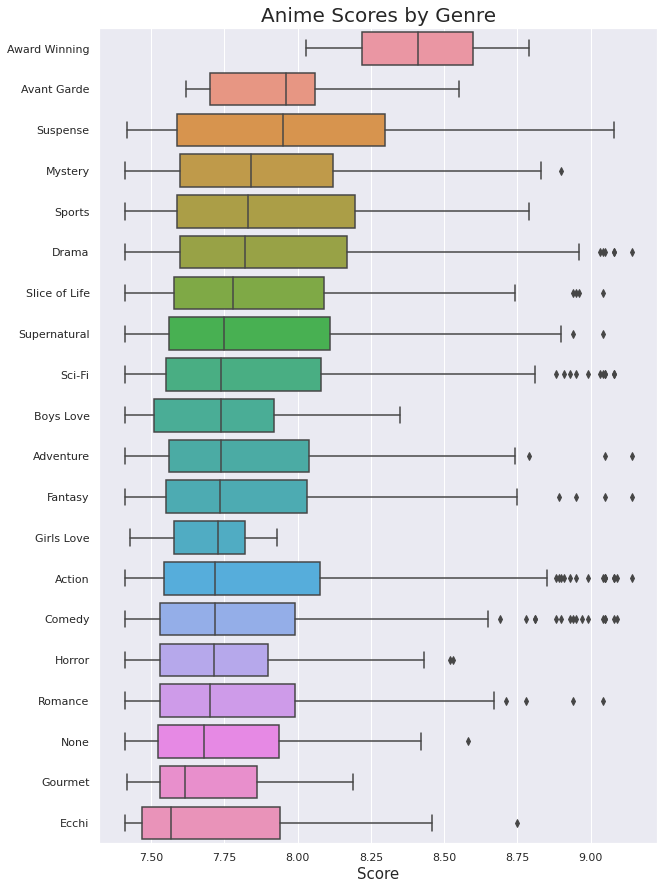

In [15]:
#Average score by genre
ordered_cats = df_genre_exp.groupby("Genres").Score.median().sort_values(ascending=False).index.values
plt.rcParams["figure.figsize"] = (10, 15)
ax = sns.boxplot(y="Genres", x="Score", order=ordered_cats, data=df_genre_exp)
ax.set_xlabel("Score", fontsize=15)
ax.set_ylabel("")
ax.set_title("Anime Scores by Genre", fontsize=20)

This plot gives us a lot of information:
* The **Award Winning** "Genre" has a Median value of 8.40 and by far the best score distribution of all the Genres, wich makes total sense.
* The **Avant Garde** and **Suspense** Genres stand out a bit from the others due to their Median value of about 7.90.
* The worst rated Anime Genres (from the Top 2000) are **Ecchi** and **Gourmet**.
* Many genres, despite having an average distribution, have many anime with unusually high scores, which can be seen as diamonds (outliers). Note that these genres coincide with the most popular of the previous graph, wich makes sense.

Let's explore the **Studio** column. We need to convert it to list, and explode it, the same as we did with the **Genre** column.

In [16]:
#Transform and explode the Studio column
df["Studio"] = df["Studio"].apply(str_values_to_list)
df_studio_exp = df.explode("Studio")
df_studio_exp["Studio"] = df_studio_exp["Studio"].apply(str.strip)
#See the results
df_studio_exp.head()

,Name,Type,Score,Score Rank,Popularity Rank,Studio,Num. of episodes,Genres,Theme(s),Demographic,Start Date,End Date,Year
0,Fullmetal Alchemist: Brotherhood,TV,9.14,1,3,Bones,64,"[Action, Adventure, Drama, Fantasy]",['Military'],Shounen,2009-04-05,"Jul 4, 2010",2009
1,Spy x Family,TV,9.09,2,350,Wit Studio,12,"[Action, Comedy]",['Childcare'],Shounen,2022-04-09,?,2022
1,Spy x Family,TV,9.09,2,350,CloverWorks,12,"[Action, Comedy]",['Childcare'],Shounen,2022-04-09,?,2022
2,Shingeki no Kyojin Season 3 Part 2,TV,9.08,3,32,Wit Studio,10,"[Action, Drama]","['Gore', 'Military', 'Survival']",Shounen,2019-04-29,"Jul 1, 2019",2019
3,Steins;Gate,TV,9.08,4,13,White Fox,24,"[Drama, Sci-Fi, Suspense]","['Psychological', 'Time Travel']",None,2011-04-06,"Sep 14, 2011",2011


Now we have an entry for each **Studio** in each Anime, so we can group by Studio.

We are interested in *Total Animes by Studio* and *Average Score by Studio*, so let's craft a Dataframe "studios" where we can work on.

In [17]:
#Total animes by studio
animes_by_studio = df_studio_exp.groupby("Studio").size().sort_values(ascending=False).reset_index()
animes_by_studio.columns = ["Studio", "Animes"]
#Average scores by studio
scores_by_studio = df_studio_exp.groupby("Studio").Score.mean().sort_values(ascending=False).reset_index()
scores_by_studio.columns = ["Studio", "Avg_score"]
#Merge 2 dataframes on column "Studio"
studios = animes_by_studio.merge(scores_by_studio, left_on="Studio", right_on="Studio")
#Drop Animes with Studio="None"
studios.drop(studios[studios["Studio"] == "None"].index, axis=0, inplace=True)
#See the results
studios.head()

,Studio,Animes,Avg_score
0,Production I.G,117,7.862650
1,Sunrise,112,7.835714
2,Toei Animation,106,7.720283
3,Madhouse,99,7.981111
4,Studio Deen,82,7.731707


Nice, now we can make some plots with this data. Let's start by exploring the relation between this 2 values with a **scatterplot**.

Text(0.5, 1.0, 'Animes released and Average Score by Studio')

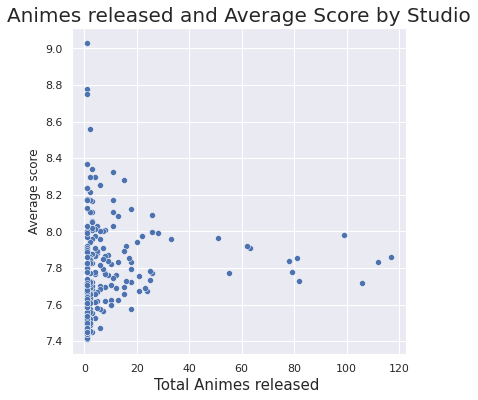

In [18]:
#Scatterplot of Animes vs Avg_score
plt.rcParams["figure.figsize"] = (6, 6)
ax = sns.scatterplot(x="Animes", y="Avg_score", data=studios)
ax.set_xlabel("Total Animes released ", fontsize=15)
ax.set_ylabel("Average score")
ax.set_title("Animes released and Average Score by Studio", fontsize=20)

It seems that there is not a great correlation between both values.

However, what we can notice is that the highest average scores correspond to studies with less than 5 anime released. To be fair we are going to look at those studios with more than 5 anime released.

Let's see the **Studios** with *more animes released* and with *higher average scores* and compare.

Text(0.5, 0.98, 'Top 20 popular Studios and Top 20 Average Scores')

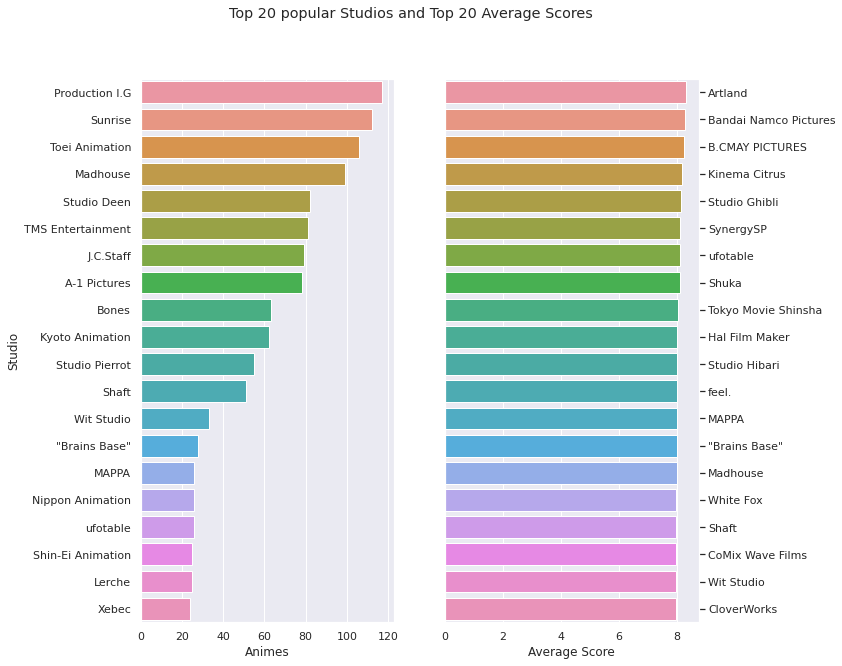

In [19]:
#Filter for studios with more than 5 animes
valid_studios = studios[studios["Animes"] > 5]
#Plot both graphs
fig, axes = plt.subplots(1, 2, figsize=(10,10))
ax0 = sns.barplot(y="Studio", x="Animes",
                  data=valid_studios.sort_values("Animes", ascending=False)[:20], ax=axes[0])
ax1 = sns.barplot(y="Studio", x="Avg_score",
                  data=valid_studios.sort_values("Avg_score", ascending=False)[:20], ax=axes[1])
ax1.set_xlabel("Average Score")
#Stick Y label ticks to right for readibilty
ax1.set_ylabel("")
ax1.yaxis.tick_right()
#Title
fig.suptitle("Top 20 popular Studios and Top 20 Average Scores")

We can see some studios with really high number of Animes released. On the other hand the Top 20 best rated Studios have pretty the same Average Score.

We can see some matches in both plots, like: **MAPPA**, **"Brains Base"**, **ufotable**, **Wit Studio**.

But without a doubt the most striking is **MadHouse**, which with almost *100 animes released* maintains an *average score of 8.0*.